In [1]:
# import cell

import xarray as xr # to work with multi-dimensional arrays
import numpy as np # to work with multi-dimensional arrays
import time # used to note current time

import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib.colors as colors # for custom colourbars
import matplotlib.ticker as ticker # for custom tick label formatting
import cartopy # use for geographic map projections
import cartopy.crs as ccrs # use for geographic map projections

print(f'Import cell run @ {time.ctime()}')

Import cell run @ Mon Sep 21 22:30:27 2020


### Absolute Population Count and Pre-Industrial Anomaly: Current and Future Scenarios

In [2]:
# load data for figure
ncar_pw = f'/home/ucfagtj/DATA/Dissertation/Data/Population/processed/ncar_pop_variables_1x1_res_with_anom.nc'
hyde_pw = f'/home/ucfagtj/DATA/Dissertation/Data/Population/processed/hyde3_2_pop_variables_1x1_res.nc'
ncar_ds, hyde_ds = xr.open_dataset(ncar_pw), xr.open_dataset(hyde_pw)
pop_ds = xr.Dataset() # create Dataset object to store both datasets in

# populate Dataset object with desired variables
pop_ds['current_mean_totalc'] = hyde_ds['current_mean_popc']
pop_ds['current_mean_totalc_anom_preind'] = hyde_ds['current_mean_popc_anom']
pop_ds['ssp1_mean_totalc'] = ncar_ds['ssp1_mean_totalc']
pop_ds['ssp1_mean_totalc_anom_preind'] = ncar_ds['ssp1_mean_totalc_anom_preind']
pop_ds['ssp2_mean_totalc'] = ncar_ds['ssp2_mean_totalc']
pop_ds['ssp2_mean_totalc_anom_preind'] = ncar_ds['ssp2_mean_totalc_anom_preind']
pop_ds['ssp3_mean_totalc'] = ncar_ds['ssp3_mean_totalc']
pop_ds['ssp3_mean_totalc_anom_preind'] = ncar_ds['ssp3_mean_totalc_anom_preind']
pop_ds['ssp5_mean_totalc'] = ncar_ds['ssp5_mean_totalc']
pop_ds['ssp5_mean_totalc_anom_preind'] = ncar_ds['ssp5_mean_totalc_anom_preind']

ncar_ds.close(), hyde_ds.close(), pop_ds.close()

(None, None, None)

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/population/population_count_and_anomalies.png


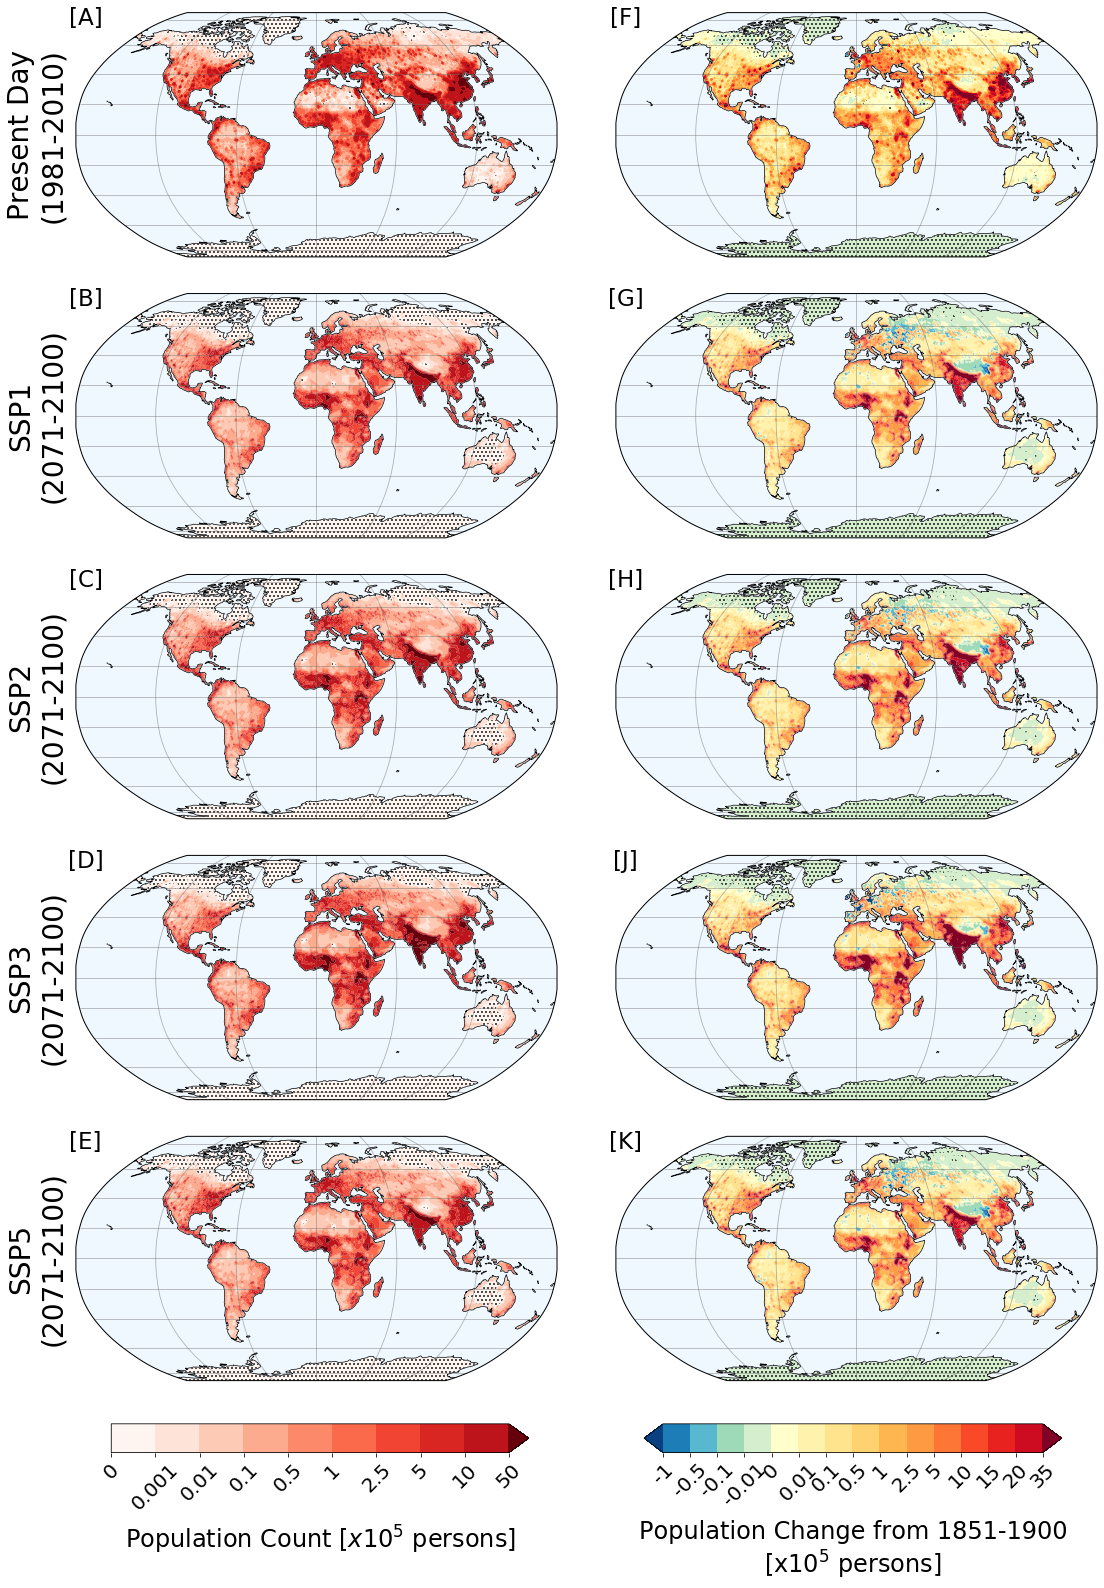

In [6]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_header_fs = 28
plot_label_fs = 23
tick_label_fs = 20


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'F')
col1, col2 = axes[0: 5], axes[5: 10]
titles = ['Present Day', 'SSP1', 'SSP2', 'SSP3', 'SSP5']
periods = ['1981-2010', '2071-2100', '2071-2100', '2071-2100', '2071-2100']
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[J]', '[K]']

# create subplot bases
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.text(x = 0.02, y = 0.95, s = label[i], fontsize = plot_label_fs,
             horizontalalignment = 'center', transform = axs.transAxes)
for i, axs in enumerate(axes[0: 5]):
    axs.text(x = -0.08, y = 0.5, s = f'{titles[i]}\n({periods[i]})', fontsize = plot_header_fs,
             verticalalignment = 'center', horizontalalignment = 'center', rotation = 'vertical',
             transform = axs.transAxes, weight = 'normal')
    
# adjust position of subplots to make space for colourbars beneath and reduce whitespacing
fig.subplots_adjust(bottom = 0.05, top = 1, left = 0., right = 1., # also shift for labes 
                    wspace = -0.4 , hspace = 0.15)

# create a list of variable basenames; makes plotting simpler later
var_base = [f'{ssp}_mean_totalc' for ssp in ['current', 'ssp1', 'ssp2', 'ssp3', 'ssp5']]


########## column 1: absolute population count ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0, 100, 1000, 10000, 50000, 100000, 250000, 500000, 1000000, 5000000, 10000000000])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('Reds', len(bnds1))
colours1 = list(colour_list1(np.arange(len(bnds1))))

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour valu
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([0, 100, 1000, 10000, 50000, 100000, 250000, 500000, 1000000, 5000000])

# map colourmap object to first output; to be used to plot colour bar
cm1 = col1[0].contourf(pop_ds.lon, pop_ds.lat, pop_ds[f'{var_base[0]}'],
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining outputs
for i, axs in enumerate(col1[1: ]):
    axs.contourf(pop_ds.lon, pop_ds.lat, pop_ds[f'{var_base[i + 1]}'],
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'max',
                 antialiased = True,
                 alpha = 1)
    
# plot areas with data equal to 0 with hatches
for i, axs in enumerate(col1):
    axs.contourf(pop_ds.lon, pop_ds.lat, 
                 pop_ds[f'{var_base[i]}'].where(pop_ds[f'{var_base[i]}'] == 0, 1), # non zero values = 0
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not

# add colourbar
cb_axs1 = fig.add_axes([0.17, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar_num_format = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 100000)) # custom formula for tick format
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max', orientation = 'horizontal',
                     ticks = lvls1, format = cbar_num_format)
cbar1.ax.tick_params(labelsize = tick_label_fs, labelrotation = 45)
cbar1.set_label(label = 'Population Count [$x10^{5}$ persons]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## column 2: population pre-industrial anomaly ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds2 = np.array([-10000000, -100000, -50000, -10000, -1000, 0,
                  1000, 10000, 50000, 100000, 250000, 500000, 1000000, 1500000, 2000000, 3500000, 10000000])

# count number of negative and postive bound values
neg_bnds2 = sum(1 for i in bnds2 if i < 0)
pos_bnds2 = len(bnds2) - neg_bnds2

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
pos_colour_list2 = plt.cm.get_cmap('YlOrRd', pos_bnds2)
neg_colour_list2 = plt.cm.get_cmap('GnBu_r', neg_bnds2 + 1) # so can exclude additional colour to match 
colours2 = np.vstack((neg_colour_list2(np.arange(neg_bnds2 + 1))[: -1], # exclude additional colour
                      pos_colour_list2(np.arange(pos_bnds2))))
colours2 = list(colours2)

# create custom colourmap; set colours of values exceeding contour levels set
cmap2 = colors.ListedColormap(colours2[1 :-1], '') # create colourmap object from specified colours
cmap2.set_over(colours2[-1]) # set colour of values exceeding upper contour value
cmap2.set_under(colours2[0]) # set colours of values exceeding lower contour value
norm2 = colors.BoundaryNorm(boundaries = bnds2,
                            ncolors = len(bnds2) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls2 = np.array([-100000, -50000, -10000, -1000, 0,
                  1000, 10000, 50000, 100000, 250000, 500000, 1000000, 1500000, 2000000, 3500000])

# map colourmap object to first model output; to be used in plot colour bar
cm2 = col2[0].contourf(pop_ds.lon, pop_ds.lat, pop_ds[f'{var_base[0]}_anom_preind'],
                       transform = transform, levels = lvls2, norm = norm2,
                       cmap = cmap2, extend = 'both')

# plot remaining model outputs
for i, axs in enumerate(col2[1: ]):
    axs.contourf(pop_ds.lon, pop_ds.lat, pop_ds[f'{var_base[i + 1]}_anom_preind'],
                 transform = transform, levels = lvls2, norm = norm2,
                 cmap = cmap2, extend = 'both',
                 antialiased = True, alpha = 1)
    
# plot areas with data equal to 0 with hatches
for i, axs in enumerate(col2):
    axs.contourf(pop_ds.lon, pop_ds.lat, 
                 pop_ds[f'{var_base[i]}_anom_preind'].where(pop_ds[f'{var_base[i]}_anom_preind'] == 0, 1),
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not

# add colourbar
cb_axs2 = fig.add_axes([0.54, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar_num_format = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 100000)) # custom formula for tick format
cbar2 = fig.colorbar(cm2, cax = cb_axs2, extend = 'both', orientation = 'horizontal',
                     ticks = np.where(lvls2 == -0.002, 0, lvls2),
                     format = cbar_num_format)
cbar2.ax.tick_params(labelsize = tick_label_fs, labelrotation = 45)
cbar2.set_label(label = 'Population Change from 1851-1900\n[x$10^5$ persons]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)



########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/population/population_count_and_anomalies.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)